In [1]:
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import numpy as np
import mpl_toolkits.mplot3d
import time
from pylab import rcParams
%matplotlib inline

In [2]:

"""
    Recebe como parâmetros x e y, arrays que definem os pontos coordenados usados para aproximar 
    uma função f = z(x,y) e, por fim, plota na tela o gráfico em 3D de sua superfície, seu mapa de calor e seu mapa de contorno.    

"""

def interp_plot(x, y, z, graph_title='Graph', interp_type='linear'):
    rcParams['figure.figsize'] = (8, 6) #Define o tamanho da figura do gráfico
    init = time.time()
    
    XX, YY = np.meshgrid(x, y) #Iguala o shape dos arrays, XX = matriz onde todas as linhas são iguais ao array X
                               #                           YY = matriz onde todas as colunas são iguais ao array Y
    
    f = interp.interp2d(x, y, z, kind=interp_type)
    n_points = 300

    xnew = np.linspace(start=min(x), stop=max(x), num=n_points) #Cria um array ordenado igualmente espaçado de tamanho = n_points no intervalo [menor valor(x), maior valor(x)] 
    ynew = np.linspace(start=min(y), stop=max(y), num=n_points) #Cria um array ordenado igualmente espaçado de tamanho = n_points no intervalo [menor valor(y), maior valor(y)]
    znew = f(xnew, ynew) #Obtém os pontos de z através da função interpolada e dos pontos coordenados criados por xnew e ynew

    XXnew, YYnew = np.meshgrid(xnew, ynew)

    plt.figure()
    ax1 = plt.axes([0.05, 0.05, 0.9, 0.9], projection='3d') #Define a superfície
    ax1.plot_surface(XX, YY, z) #Plota a superfície
    ax1.set_title(graph_title)
    ax1.set_xlabel("X Axis")
    ax1.set_ylabel("Y Axis")
    ax1.set_zlabel("Z Axis")
    
    fig = plt.figure()
    ax2 = plt.axes([0.05, 0.05, 0.9, 0.9], projection='3d') #Define a superfície
    surface = ax2.plot_surface(XXnew, YYnew, znew, rstride=1, cstride=1, #Plota a superfície adicionando a ela seu mapa de calor
                              cmap='jet', linewidth=0.25)
    ax2.set_title(graph_title)
    ax2.set_xlabel("X Axis")
    ax2.set_ylabel("Y Axis")
    ax2.set_zlabel("Z Axis")
    
    plt.figure()
    cf = plt.contourf(x, y, z, cmap='jet') #Plota um mapa de contorno da função
    plt.colorbar() #Adiciona uma barra de calor ao gráfico
    plt.title("{}  - Contours".format(graph_title))
    plt.show()
    
  
    end = time.time()
    print("Tempo de execução: {}".format(end - init))

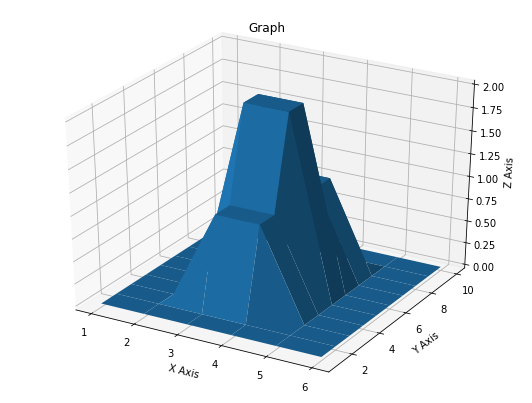

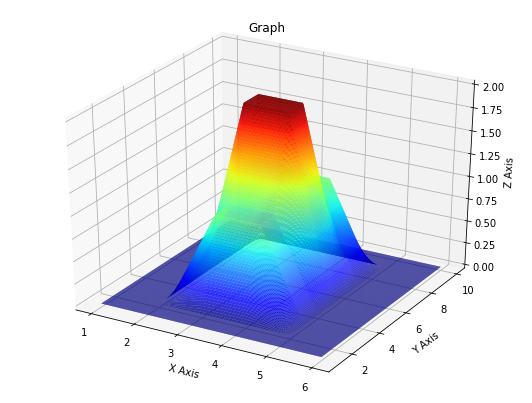

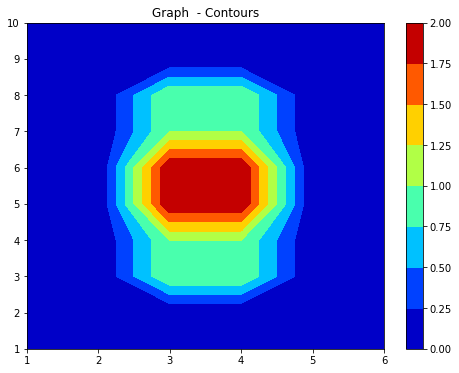

Tempo de execução: 5.782965421676636


In [7]:
########################################
############ ALGUNS EXEMPLOS ###########
########################################


# 1- Dado um conjunto de dados
x = np.array([1, 2, 3, 4, 5, 6]) ; y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
z =  np.array([[0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 1, 1, 0, 0],
               [0, 0, 1, 1, 0, 0],
               [0, 0, 2, 2, 0, 0],
               [0, 0, 2, 2, 0, 0],
               [0, 0, 1, 1, 0, 0],
               [0, 0, 1, 1, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])
interp_plot(x, y, z)


# 2 - Dado um z = sin(x, y)
x = np.arange(0, 4*np.pi, 0.1); y = np.arange(0, 4*np.pi, 0.1)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx, yy) #Parâmetro Z precisa ser bidimensional
#interp_plot(x, y, z)


# 3 - Dado um z = cos(x^2+ y^2)
x = np.arange(0, 2*np.pi, 0.1);  y = np.arange(0, 4*np.pi, 0.1)
xx, yy = np.meshgrid(x, y)
z = np.cos(xx*2 + yy*2)
#interp_plot(x, y, z)